# Data Science And Business Analytics(GRIP May'21)
## Task 1: Prediction using Supervised ML
### Author: Nishchal Mittal
#### Problem Statement: 
#### What will be predicted score if a student studies for 9.25hrs/day?

##### (1)Importing all the required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

##### (2) importing data set and vizualizing Data


In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
print('Data has been successfully imported')
df

Data has been successfully imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In our DataFrame, we have data of 25 students whose study hours are given and achieved score by them are given. 
Now we will plot the data so that we can roughly find what type of relationship is between Hourse and score

##### (3) Plotting the data

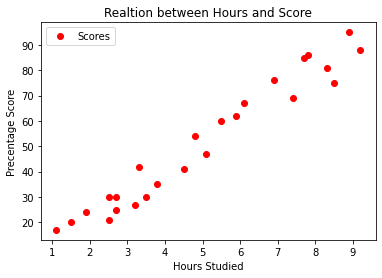

In [3]:
#Using Matplotlib Library
df.plot(x='Hours',y='Scores', style='o', color='r')
plt.title('Realtion between Hours and Score')
plt.xlabel('Hours Studied')
plt.ylabel('Precentage Score')
plt.show()

###### as we can clearly observe that it is a positive linear relationship between no. of hours studied and percentage score.
#### (4) Preparing Data
Now this involves the spilling Dataset into train and test dataset.


In [4]:
#Using train_test_spilt from scikit-learn library
x= df.drop('Scores',axis=1)
y= df['Scores']

train_x,test_x,train_y,test_y= train_test_split(x,y,test_size=0.2,random_state=123)


#### (5)  Training the Algorithm
Now after spilling we do fit the 80% of our data as training data set into the linear regression algorithm


In [5]:
lin= LinearRegression()
lin.fit(train_x,train_y)

print('Fitting the data into Linear Regression algorithm is complete')

Fitting the data into Linear Regression algorithm is complete


In [6]:
print('intercept= {},\
slope coefficient={}'.format(lin.intercept_,lin.coef_))

intercept= 2.695388922345728,slope coefficient=[9.60171878]


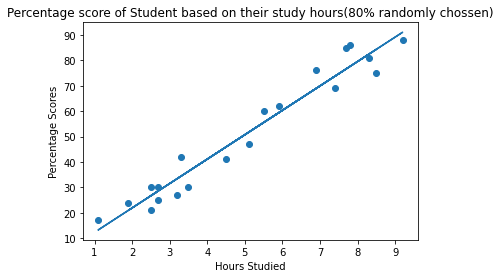

In [7]:
#the regression line (y= a+bx)
line= lin.intercept_+lin.coef_*train_x

#Plotting the scatter plot with regression line
plt.scatter(train_x,train_y)
plt.plot(train_x,line)
plt.title('Percentage score of Student based on their study hours(80% randomly chossen)')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scores')
plt.show()

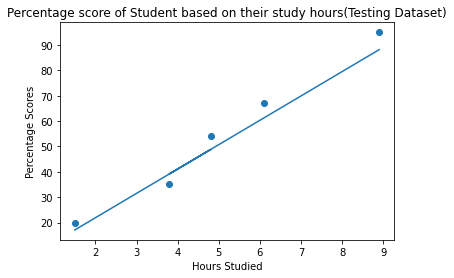

In [8]:
#Plotting The regression line for Test data
line2= line= lin.intercept_+lin.coef_*test_x

plt.scatter(test_x,test_y)
plt.plot(test_x,line)
plt.title('Percentage score of Student based on their study hours(Testing Dataset)')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scores')
plt.show()

#### (6) Projection of Percentage Score of Students


In [9]:
print(test_x) #Testing_data in hours
pred_y=lin.predict(test_x) # projection of scores

    Hours
5     1.5
21    4.8
22    3.8
18    6.1
15    8.9


In [10]:
# Comparing Actual and Predicted 

df_compare= pd.DataFrame({'Actual':test_y,'Predicted':pred_y})
df_compare

,Actual,Predicted
5,20,17.097967
21,54,48.783639
22,35,39.181920
18,67,61.265873
15,95,88.150686


In [11]:
# using the particular value of Hours Studied
hours= [9.2]
value=lin.predict([hours])
print('For no. of hours {}, predicted score is {}'.format(hours,value))

For no. of hours [9.2], predicted score is [91.03120168]


#### (7) Accuracy of the model
The final step is to check for accuracy of the algorithm we have used to project the score on the basis of no. of hours studied by student. This is generally used for comparing between different models of Machine Learning

In [12]:
print('Mean_squared_error= {}, r2 Score={}'.format(mean_squared_error(test_y,pred_y),r2_score(test_y,pred_y)))

Mean_squared_error= 26.582796488881115, r2 Score=0.9605221627526418


#### So we have got  $$R^2 =0.9605 $$ that indicates 96% proportion of the variance for percentage scores is explained by hours studied